# COGS 118B - Final Project

# Classifying Spam Vesus Non Spam Mail Using Dimensionality Reduction and Supervised Algorithms 

## Group members
- Banso Nguyen
- Mi Jin Son
- Ricky Zhu
- Jason Tan
- Takumi Sugita

# Abstract 
In our model, we address the pervasive problem of email spam by developing a machine learning model that effectively differentiates between unwanted spam and legitimate ham emails. Utilizing a Kaggle dataset with 5170 emails, we aim to leverage both text content and metadata features to train our model. The emails are quantified by their textual content and metadata attributes, such as subject lines and sender information. Our approach will involve an initial phase of unsupervised learning, followed by the application of other techniques to refine the model's predictive accuracy. The performance of our model will be evaluated based on its precision, recall, and overall accuracy in correctly classifying emails into the respective categories. Through this methodology, we aim to reduce the incidence of false positives—where legitimate emails are incorrectly marked as spam—while maintaining a high detection rate of true spam messages, ensuring users receive important emails without the interference of unwanted content.

# Background
The digital age has brought with it an increasing reliance on email communication, paralleled by a rise of spam emails, which are unsolicited messages often sent in bulk for advertising, phishing, spreading malware, or fraud. Historically, spam constituted a minor nuisance, but it has evolved into a significant cybersecurity threat, with The Radicati Group reporting that spam emails accounted for 54% of all email traffic in mid-2021.

After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds.

Initial efforts to combat spam relied on simple, rule-based filters, such as blacklisting certain senders or flagging messages containing specific keywords [1](https://www.researchgate.net/publication/221650814_Spam_Filtering_with_Naive_Bayes_-_Which_Naive_Bayes). However, spammers quickly adapted, evolving their strategies to evade these static defenses. As a result, the focus shifted towards more sophisticated, dynamic methods of detection.

The advent of machine learning offered new prospects for spam detection. Supervised learning models, which require large sets of labeled data, have been effective but also labor-intensive and inflexible against spammers' ever-changing tactics [2](https://dl.acm.org/doi/10.1145/1247715.1247717).To address these issues, researchers began exploring unsupervised learning algorithms, which do not require pre-labeled datasets and are capable of detecting patterns and anomalies indicative of spam on their own [3](https://link.springer.com/article/10.1007/s10462-009-9109-6). 

Clustering algorithms have been instrumental in unsupervised learning for spam detection, identifying natural groupings within data that can suggest common characteristics of spam or ham emails [4](https://www.researchgate.net/publication/4096676_Adaptive_filtering_of_spam)  . Feature engineering has enhanced this process by identifying key characteristics from email content and metadata that are most indicative of spam, including message headers, the frequency of certain words, the use of HTML, and the inclusion of URLs [5](#https://www.researchgate.net/publication/258514273_Towards_SMS_Spam_Filtering_Results_under_a_New_Dataset)  

Despite the potential of unsupervised learning, it is not without challenges. The varying nature of spam content, the continuous adaptation by spammers, and the risk of classifying legitimate emails as spam (false positives) complicate the model development process [6](#https://ieeexplore.ieee.org/document/788645) .Furthermore, the lack of labeled data can make it difficult to assess the true performance of these models, which is why semi-supervised approaches that combine unsupervised clustering with a small set of labeled data for validation are gaining traction [7](#https://ieeexplore.ieee.org/document/1374241)

In response to these challenges, our project aims to develop an unsupervised machine learning model capable of accurately identifying and segregating spam from legitimate emails. By leveraging unsupervised machine learning and sophisticated feature extraction techniques, we hope to build a model that not only detects current spam strategies but is also robust enough to adapt to future tactics used by spammers.


# Problem Statement

Detecting spam mail relies on comparing spam email and non-spam email features. Our group will use machine learning and natural language processing techniques to explore which email feature(s) produce the highest precision and accuracy values when predicting spam mail.

# Data

- **Link**: https://www.kaggle.com/code/ananthu19/email-spam-detection-with-ml/input
- **Description**: 4 variables, 5,572 observations. 
- **Each observation** consists of the email number, the label given to the emails determining whether they are spam or ham(not spam), the text of the email, and the one-hot encoded column for spam labels(1 for spam, 0 else). 
- **Critical variables**: 
  - Label: Determining whether the emails are categorized as spam or not spam, represented using both text form and numerical form: Spam or Ham, or 1 for spam, 0 else.
  - Message: The text of the email, useful for sentimental analysis to evaluate whether a given email is spam or not. Represented in the form in one string of the whole text. 
- **Cleaning/Transformations**:
  - Clean out any invalid emails that might contain incomplete information.
  - Check to see if every value in the dataset satisfies the correct type for each corresponding column. 
  - The text of the email might contain various elements that are not useful for spam classification, such as punctuation, special characters, numbers, and repetitive common words that provides no meaning to the identification of emails including "and", "the", "is", etc.
  - Converting text to lowercase, and tokenizing the email text into individual words, and compute TF-IDF in terms of all the email messages in the dataset to extract features that are useful and representative in both unsupervised and supervised machine learning.
  - Complete process are labeled in here and in the file "Data_cleaning" of this repo

# Proposed Solution

Our group will use the natural language toolkit (nitk) to tranform the different features we choose to run an unsupervised algorithm to reduce dimensionality and find the most prominent features. The initial algorithm we have in mind are PCA. 

Principal Component Analysis (PCA) is a statistical technique used in machine learning to simplify the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the original variables into a new set of variables, the principal components, which are ordered by the amount of original variance they retain. The first principal component holds the most variance, the second holds the second most, and so on. This process is known as dimensionality reduction and is particularly useful when you have data with many variables, allowing for easier visualization and analysis.

We can use PCA to guess which features may be most prominent based on the results. After we find estimates of the most prominent features we will use them in unsupervised clustering models such as GMM and compare it to supervised classification algorithms such as logistic regression or random forests to classify if mail is spam or not and get accurcy and precision results.

# Evaluation Metrics

One evaluation metric that can be used for the performance of the PCA is calculating the reconstruction error. It measures the dissimilartiy between the original data and the data reconstructed from the reduced-dimensional representation. The reconstruction error helps assess how well the reduced representation captures the important features of the original data. $$E_{recon} = \frac{1}{N}\sum_i=1^{N} ||X_{i}-\hat{X_i}||^2$$ This is essentially calcuated the mean squared error of the Euclidean distances between the corresponding elements of the original and reconstructed data points. 


One evaluation metric that could be used to quantify the performance of the classification (supervised) model is the F-1 score. This score is the harmonic mean of precision and recall. $$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$ 

Precision is the ratio of correctly predicted positive observations to the total predicted positives. $$Precision = \frac{True Positives}{True Positives+False Positives}$$ 

Recall is the ratio of correctly predicted positive observations to all the observations in the actuall class. 
$$Recall = \frac{True Positives}{True Positives+False Negatives}$$


Since F1 score considers both precision and recall, it provides a metric that considers false positives and false negatives. If we have a high F1=score, it means that we have a good balance between precision and recall. It is important to consider false positives and false negatives because we do not want non-spam emails to be considered as spam because they can contain important information and we do not want spam to infiltrate into the inbox. 

# Results

In [17]:
import pandas as pd 
import numpy as np
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

### Subsection 1 EDA on Dataset

To look for any relevent patterns in the large dataset our group used PCA and t-SNE to visulaize the data; However, the plots from both PCA and t-SNE reveal no useful information about the features in the dataset. This is most likely due to the large number features in our dataset and also the sparse structure of our TFIDF matrix data. As a result we need a lot more princple components, which is harder to visualize. We also decided to use PCA to reduce dimensions over t-SNE because of the sparse nature of our data and PCA is less computationally expensive.


To do a simple short comparison between unsupervised and supervised learning algorithms we used GMM clustering using 70 PCs (85% explained variance), kept the number of GMM components at two and tested on the full covariance structure to see how a unsupervised technique would perform for clustering spam versus non spam mail. As predicted, Silhouette and Adjusted random index scores indicate GMM did not perform well. This is most likely due to the curse of dimensionality problem because when working with TFIDF data there are a large number of features. Moreover, TFIDF produces a sparse matrix data. Our dataset also contained labels and having labels would easily produce better results. As a result for the rest of the report we focused on supervised algorithms (logistic regression and random forest tree) to classify spam versus non spam mail.

![image](pca.png)
![image](t-SNE.png)
![image](ugmm.png)

In [18]:
#load data
data = pd.read_csv('spam.csv')

#clean data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    return text

# Define the remove stop words function
def remove_stop_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_tokens)

# Apply the cleaning functions
data['Message'] = data['Message'].apply(clean_text).apply(remove_stop_words)

data['label'] = data['Category'].apply(lambda x: 0.0 if x == 'ham' else 1.0)

In [5]:
#Need to reduce the number of features from 3000 to 100, too many features to run for PCA+GMM
X = data['Message']
y = data['label']

#The model we will need to evaluate in train, test, validation set. 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(X)
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Display the first few rows of the DataFrame
tfidf_df

,amp,ask,babe,buy,care,cash,claim,come,contact,cos,...,want,wat,way,week,went,win,won,work,yeah,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.616585,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.575093,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.437018,0.0,0.477017,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.473208,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.543524,0.0,0.000000,0.000000,0.0,0.0,0.0


### Subsection 2 PCA Dimensionality Reduction

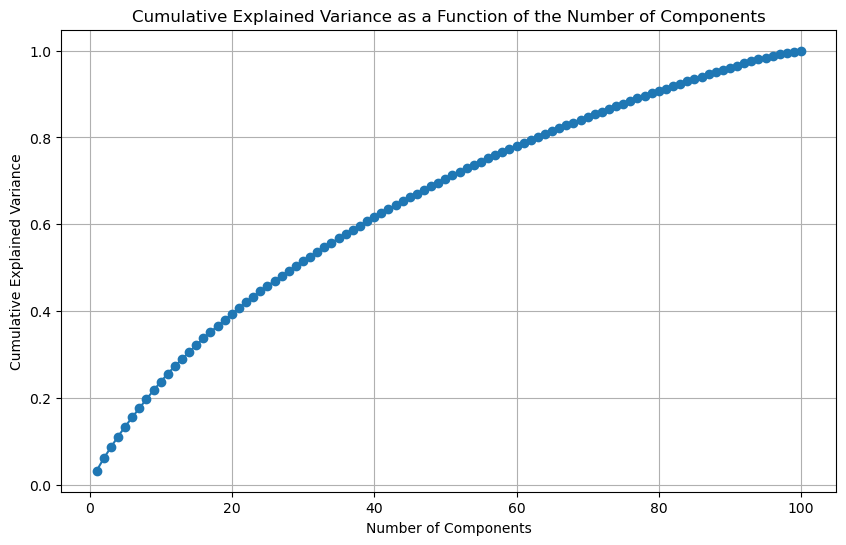

In [15]:
pca = PCA().fit(X_tfidf.toarray())

# Calculate cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

In [14]:
pca_85 = PCA(n_components=70)
red_85 = pca_85.fit_transform(tfidf_df) 
reduced_85 = pd.DataFrame(red_85).join(data['label'])
reduced_85

pca_90 = PCA(n_components=78)
red_90 = pca_90.fit_transform(tfidf_df) 
reduced_90 = pd.DataFrame(red_90).join(data['label'])
reduced_90

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,label
0,-0.033480,-0.018448,-0.021836,-0.064706,-0.108571,0.133698,0.125778,0.040994,-0.334531,-0.186383,...,-0.024453,0.091025,0.100507,-0.034579,0.022522,0.003026,0.097666,-0.015957,-0.032661,0.0
1,-0.106856,0.910175,0.254822,0.029586,0.115957,-0.024019,-0.033970,-0.040441,-0.008035,0.050419,...,0.008875,0.004736,0.004801,-0.000581,0.006931,0.001800,-0.003366,0.005127,-0.008614,0.0
2,-0.099425,-0.103215,-0.006423,0.261571,0.023798,-0.080491,-0.172090,0.207314,-0.031984,0.377977,...,-0.027798,0.057635,-0.005720,-0.026522,-0.021476,-0.033588,0.017347,0.003661,0.038076,1.0
3,-0.035357,-0.010828,-0.014280,-0.025964,-0.022136,-0.023871,0.001195,-0.006437,-0.039037,-0.012290,...,-0.058982,-0.021947,-0.035790,0.044867,0.176391,-0.075610,-0.105598,0.040393,-0.004522,0.0
4,-0.065145,-0.039590,-0.018888,-0.124621,-0.047821,-0.268666,-0.071006,-0.312816,0.202878,-0.105515,...,-0.011363,-0.004512,-0.011326,-0.033637,-0.014406,0.001378,-0.016411,0.001821,-0.008215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,-0.068496,-0.036220,-0.042491,0.046979,-0.054034,-0.010192,-0.001216,0.040567,-0.054015,0.109473,...,-0.000901,-0.068664,0.001876,-0.008602,0.015628,-0.271272,0.146778,-0.021406,0.049630,1.0
5568,0.099654,0.036269,-0.074806,-0.013222,-0.125138,0.112729,0.063550,-0.006382,-0.087591,0.028591,...,-0.013805,0.021210,0.003840,-0.003672,0.013638,-0.020155,-0.003466,0.005683,0.001327,0.0
5569,-0.024654,-0.007569,-0.023056,-0.010217,-0.023294,-0.008370,-0.014609,0.009307,-0.023970,0.015118,...,0.013316,0.003939,0.016334,-0.007964,0.005019,0.012014,-0.014619,-0.001088,-0.000346,0.0
5570,-0.059378,-0.069349,-0.055862,-0.015114,0.176286,-0.232349,0.192350,0.278771,-0.013602,0.224721,...,0.048804,0.012377,-0.033610,-0.034161,0.001181,0.035538,0.015117,-0.004341,0.025571,0.0


In [8]:
#Find number of PC's that account for 85% and 90% of variance
var_exp_threshs = [85, 90]

total_var_exp = np.cumsum(pca.explained_variance_ratio_)

for var_exp_thresh in var_exp_threshs:
    pcindex = np.where(total_var_exp >= var_exp_thresh / 100)[0]
    print(f'Take up to PC {pcindex[0]} to get to {var_exp_thresh}% variance explained')

data_pc_85 = data.iloc[:, :71]
data_pc_90 = data.iloc[:, :79]

Take up to PC 70 to get to 85% variance explained
Take up to PC 78 to get to 90% variance explained


Given that the original dataset contains too many features to use, we set the max features to 100. Afterwards to select the number of PCs that holds a significant amount of information, but does not capture too much noise we used the elbow method and set two thresholds (85% and 90% of explained variance) to get the exact number of PCs to reduce before running the classification algorithms.

### Subsection 3 Supervised Classifcation Model

For our first supervised algorithm we chose to use random forest tree to classify spam versus non spam mail because it a already well know classification algorithm. Based on the explained variance thresholds we defined above we ran the algorithm using  70 PCs and 78 PCs to compare how different PCs influence the classifcation results and compare tradeoffs between capturing more explained variance and less noise.

In [16]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

X_85 = reduced_85.drop('label',axis=1)
X_90 = reduced_90.drop('label',axis=1)
y = data['label']

# Define the pipeline
pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

# Define parameters for grid search
parameters = {
    'clf__n_estimators': [50, 100, 200], # Random Forest parameters to tune
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

X_train_85, X_test_85, y_train_85, y_test_85 = train_test_split(X_85, y, test_size=0.2, random_state=42)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_90, y, test_size=0.2, random_state=42)


# Perform grid search
grid_search_85 = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search_85.fit(X_train_85, y_train_85)

grid_search_90 = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search_90.fit(X_train_90, y_train_90)


# Print the best parameters and best score
print("Best parameters found 70 PC's:")
print(grid_search_85.best_params_)
print("Best score with 70 PC's:")
print(grid_search_85.best_score_)

print("Best parameters found 78 PC's:")
print(grid_search_90.best_params_)
print("Best score with 78 PC's:")
print(grid_search_90.best_score_)


y_pred_85 = grid_search_85.predict(X_test_85)
y_pred_90 = grid_search_90.predict(X_test_90)

# Evaluate the model
accuracy_85 = accuracy_score(y_test_85, y_pred_85)
accuracy_90 = accuracy_score(y_test_90, y_pred_90)
print("Test Accuracy with 70 PC's}:", accuracy_85)
print("\nClassification Report for 70 PC's:")
print(classification_report(y_test_85, y_pred_85))
print("Test Accuracy with 78 PC's}:", accuracy_90)
print("\nClassification Report for 78 PC's:")
print(classification_report(y_test_90, y_pred_90))

Best parameters found 70 PC's:
{'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best score with 70 PC's:
0.9580440679842773
Best parameters found 78 PC's:
{'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Best score with 78 PC's:
0.957371422244367
Test Accuracy with 70 PC's}: 0.9605381165919282

Classification Report for 70 PC's:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       966
         1.0       0.96      0.73      0.83       149

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Test Accuracy with 78 PC's}: 0.9605381165919282

Classification Report for 78 PC's:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       966
         1.0       0.96      0.73      0.83       149

    accuracy                    

Confusion matrix:
[[962   4]
 [ 40 109]]
Confusion matrix:
[[962   4]
 [ 40 109]]


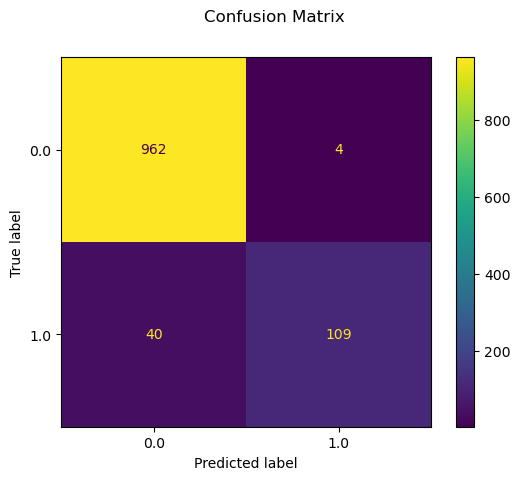

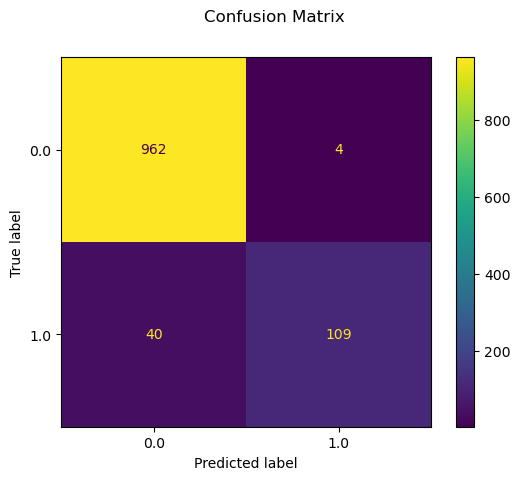

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay 

disp_85 = ConfusionMatrixDisplay.from_predictions(y_test_85, y_pred_85)
disp_85.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_85.confusion_matrix}")

disp_90 = ConfusionMatrixDisplay.from_predictions(y_test_90, y_pred_90)
disp_90.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_90.confusion_matrix}")

plt.show()

### Subsection 5 (add title) - Jason & Mijin
- I found Enron dataset and already done models. as a bench mark we can run Enron dataset on our model and compare wit the onlines best model
[link]('https://www.kaggle.com/code/juanagsolano/spam-email-classifier-from-enron-dataset#Model-train')
Maybe you do model selection again, but using a different kind of metric than before?

### Classification Report Our Model
![image](enron-dataset-our-model.jpg) 

Precision for Ham: 0.99 - This means that 99% of the instances predicted as ham were actually ham.
Recall for Ham: 0.94 - This means that 94% of the actual ham instances were correctly predicted.
F1-Score for Ham: 0.96 - This is the harmonic mean of precision and recall for ham.
Precision for Spam: 0.85 - This means 85% of the instances predicted as spam were actually spam.
Recall for Spam: 0.97 - This indicates that 97% of the actual spam instances were correctly predicted.
F1-Score for Spam: 0.91 - This is the harmonic mean of precision and recall for spam.
Overall Accuracy: 0.95 - 95% of all predictions (ham and spam) were correct.

### Classification Report Other Model
![image](enron-dataset-other-model.jpg)

Precision for Ham: 0.99 - Identical to the GaussianNB, 99% of ham predictions were correct.
Recall for Ham: 1.00 - A perfect score, meaning all actual ham emails were identified correctly.
F1-Score for Ham: 0.99 - Improved compared to the GaussianNB model.
Precision for Spam: 1.00 - A perfect score, all predicted spams were actually spam.
Recall for Spam: 0.96 - Slightly less than the GaussianNB, but still very high.
F1-Score for Spam: 0.98 - Higher than the GaussianNB model.
Overall Accuracy: 0.99 - This model correctly predicted 99% of all cases.

Our model seems to have better performance, especially in distinguishing spam emails with higher degree of precision. However, it is slightmore more prone to miss a spam email. Our model operates with reduced dimensionality compared to the full feature set and still provides higher accuracy, which is beneficial in terms of computational efficiency. 

# Discussion 

### Interpreting the result
The results from the  classifcation evaluation metrics reveal that using 70 principle components and 78 principle components yield the same precision, recall and F1 scores. The random forest tree classification works well for both PC values. Since, both values work well, using 70 PCs is more simplier model and has a better tradeoff between explained variance and noise control. In terms of the confusion matrix the number of false positives (where non spam is detected as spam mail) is 4 and for false negatives(spam mail is detected as non

### Limitations
We encountered many challenges while finding data for this project. We were satisfied with the one dataset we used because the messages looked realistic, but it was difficult to find additional relevant datasets. The few datasets we managed to find did not meet our expectations in terms of quality. Some had dirty data that would have required extremely time-consuming cleaning processes, while others contained messages that appeared entirely made up. We suspect that the lack of data available on the internet is due to privacy concerns. On top of potential legality issues, most people do not want to accidentally leak personal emails and information when scraping emails.

The dataset we used had 5572 rows, but only 747 of them were for spam emails. Therefore, we noticed that on some algorithms, the performance and results changed drastically by slightly adjusting the values of train_test_split. The lack of data probably limited the capabilities of the algorithms we used for our classification and detection, especially the unsupervised portion.
The last major limitation we encountered was that the results of the algorithms on the unsupervised portion were different from what we had hoped for. We were hoping that the unsupervised algorithms would show much more promising results, and we would put our focus on unsupervised algorithms for classification. Instead, we had to shift our focus to just PCA and supervised algorithms, but not all of us in the group had experience with supervised machine learning.  



### Ethics & Privacy
Some of the potential conerns with our project are 
1. If we use data that includes or does not anonymize personal information such as names, emails, etc. we will be breaching people's privacy. These data could then be misused by outsiders. 
2. There is a chance that the data we obtain was obtained without the consent of email users. 
3. Original sources might delete their data from Kaggle etc. because they decided to unpublicize their data. When this happens, it would be unethical for this project to still be holding on to these data. 
4. Spammers may alter their spam emails if they become aware of such prediction methods.

Our team will address these issues by 
1. We will do our best to make sure the data we use does not include personal information by searching for "@" characters to look for emails, randomly selecting lines of data and check if they include personal information, etc. If we find data that includes personal information, we will remove or hash these information. 
2.  We will research throughly where and how these data were obtained. We will only use data that were confirmed to be obtained legally and ethically. 
3. We will unpublicize the data or text files that we used for the project when the original sources of data unpublicized theirs. 

### Conclusion Takumi

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem